In [18]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker, cm
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector 
from scipy.io.wavfile import read
from scipy.io.wavfile import write
from scipy.signal.signaltools import wiener
from scipy import signal
import IPython.display as ipd


from scipy.fft import rfft, rfftfreq, fft, fftfreq, dct, idct

# Set plotting parameters:
mpl.rcParams['font.size'] = 18      # Set the general plotting font size

In [75]:
samplingFrequency, signalData = read("Sample.wav")
sample_off   = signalData[8000000:10500000,0] # freezer off
sample_noise = signalData[5400000:7900000,0] # background noise
sample_orig  = signalData[10600000:,0] # original measurement
sample_reduc = signalData[0:5300000,0] #Audacity støjreduktion
sample = sample_off[0:1000000]
print(samplingFrequency)
x = np.linspace(0, len(sample)/samplingFrequency, len(sample))

x.shape

44100


(1000000,)

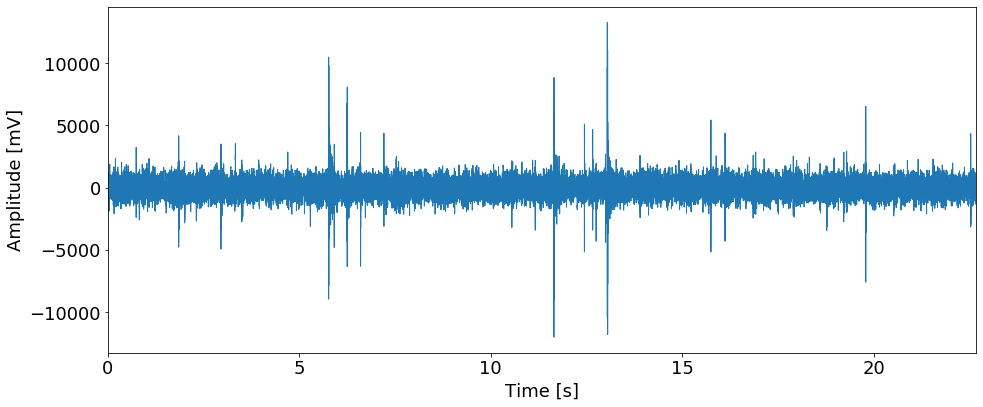

In [56]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(x, sample, linewidth='1')
ax.set_xlim(0, x[-1])
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [mV]')
fig.tight_layout()
fig.savefig('wave')

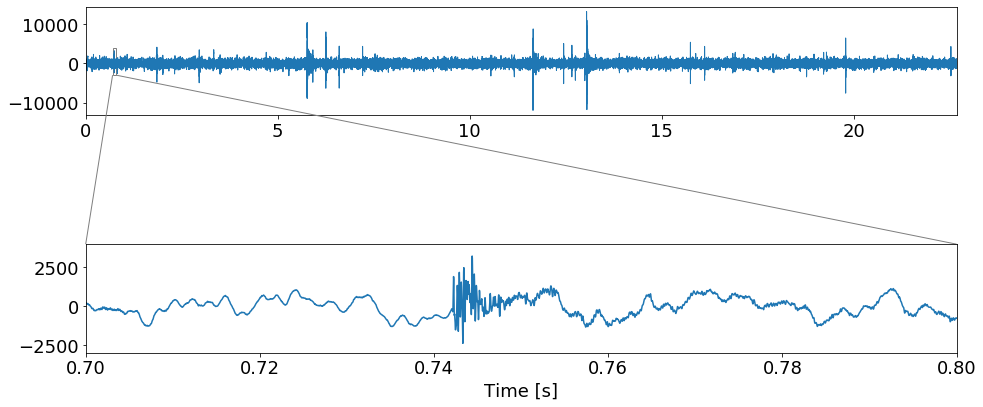

In [57]:
def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

fig, (ax, axins) = plt.subplots(2,1,figsize=(14,6))
ax.plot(x, sample, linewidth='1')
ax.set_xlim(0, x[-1])

#axins = zoomed_inset_axes(ax, 3, loc=5) # zoom = 6
axins.plot(x,sample)
x1, x2, y1, y2 = 0.7, 0.8, -3000, 4000
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('Time [s]')

mark_inset(ax, axins,loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="0.5")
fig.tight_layout()
fig.savefig('Soundwave')


In [58]:
yf = fft(sample)
xf = fftfreq(len(yf), 1 / samplingFrequency)
#yf = yf[yf > 10**6]

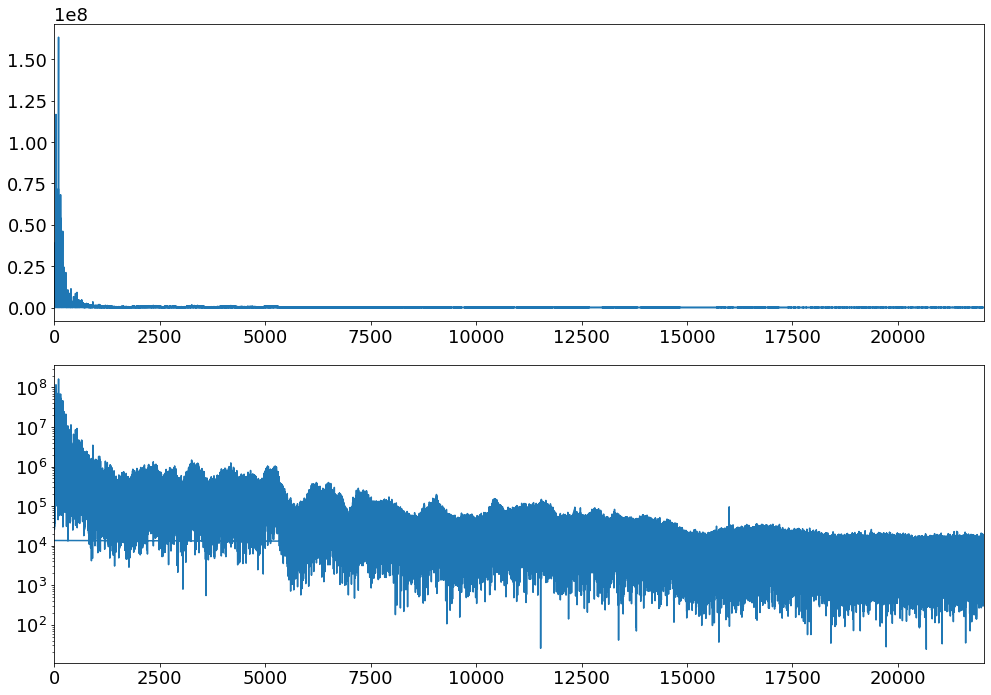

In [59]:
fig, ax = plt.subplots(2,1, figsize=(14,10))
ax[0].plot(xf, np.abs(yf))
ax[0].set_xlim(0,samplingFrequency/2)

ax[1].semilogy(xf, np.abs(yf))
ax[1].set_xlim(0, samplingFrequency/2)
fig.tight_layout()
plt.savefig('Frequency_band')
plt.show()

In [60]:
yf[0]

(-22369904-0j)

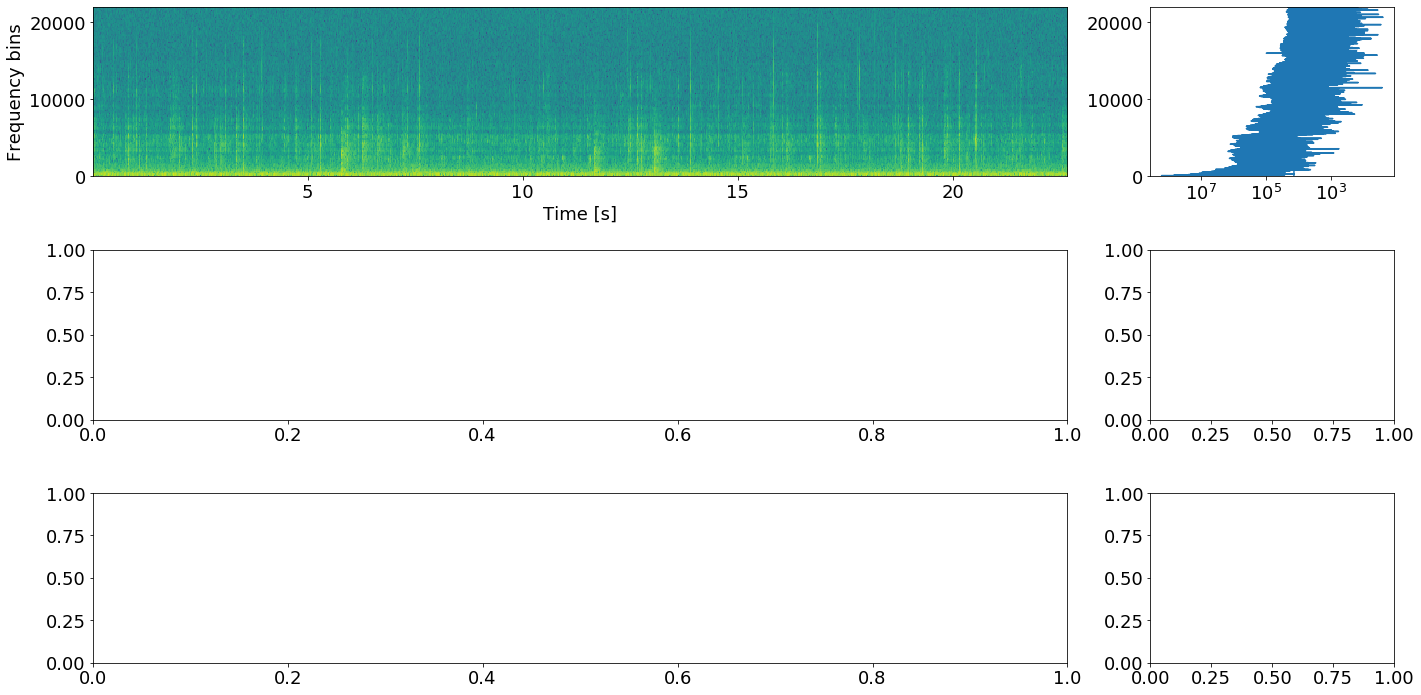

In [61]:
fig, ax = plt.subplots(3,2, gridspec_kw={
                           'width_ratios': [4, 1]}, figsize=(20,10))

ax[0,0].specgram(sample,Fs=samplingFrequency, NFFT=256, noverlap=128)
ax[0,0].set_xlabel('Time [s]')
ax[0,0].set_ylabel('Frequency bins')

ax[0,1].semilogx(np.abs(yf), xf)
ax[0,1].set_ylim(0, samplingFrequency/2)
ax[0,1].invert_xaxis()
fig.tight_layout()
plt.savefig('Frequency')
plt.show()

In [62]:
yf_off = fft(sample_off)
xf_off = fftfreq(len(yf_off), 1 / samplingFrequency)

yf_orig = fft(sample_orig)
xf_orig = fftfreq(len(yf_orig), 1 / samplingFrequency)

yf_noise = fft(sample_noise)
xf_noise = fftfreq(len(yf_noise), 1 / samplingFrequency)

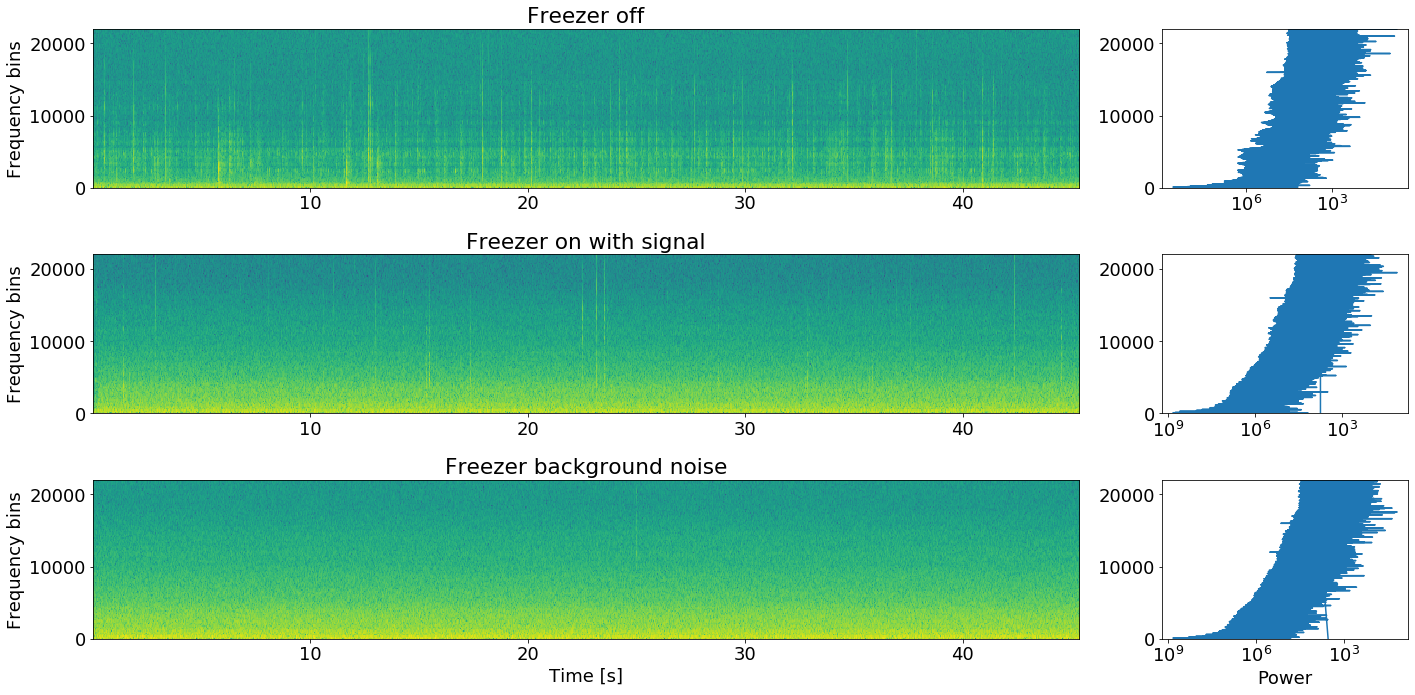

In [63]:
fig, ax = plt.subplots(3,2,gridspec_kw={
                           'width_ratios': [4, 1]}, figsize=(20,10))

ax[0,0].specgram(sample_off[0:2000000],Fs=samplingFrequency, NFFT=256, noverlap=128, label='Freezer off')
ax[0,0].set_title('Freezer off')
ax[0,0].set_ylabel('Frequency bins')

ax[1,0].specgram(sample_orig[0:2000000],Fs=samplingFrequency, NFFT=256, noverlap=128)
ax[1,0].set_title('Freezer on with signal')
ax[1,0].set_ylabel('Frequency bins')

ax[2,0].specgram(sample_noise[0:2000000],Fs=samplingFrequency, NFFT=256, noverlap=128)
ax[2,0].set_xlabel('Time [s]')
ax[2,0].set_title('Freezer background noise')
ax[2,0].set_ylabel('Frequency bins')

ax[0,1].semilogx(np.abs(yf_off), xf_off)
ax[0,1].set_ylim(0, samplingFrequency/2)
ax[0,1].invert_xaxis()

ax[1,1].semilogx(np.abs(yf_orig), xf_orig)
ax[1,1].set_ylim(0, samplingFrequency/2)
ax[1,1].invert_xaxis()

ax[2,1].semilogx(np.abs(yf_noise), xf_noise)
ax[2,1].set_ylim(0, samplingFrequency/2)
ax[2,1].set_xlabel('Power')
ax[2,1].invert_xaxis()

fig.tight_layout()
fig.savefig('Spectrogram all')
fig.show()

/opt/conda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/conda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


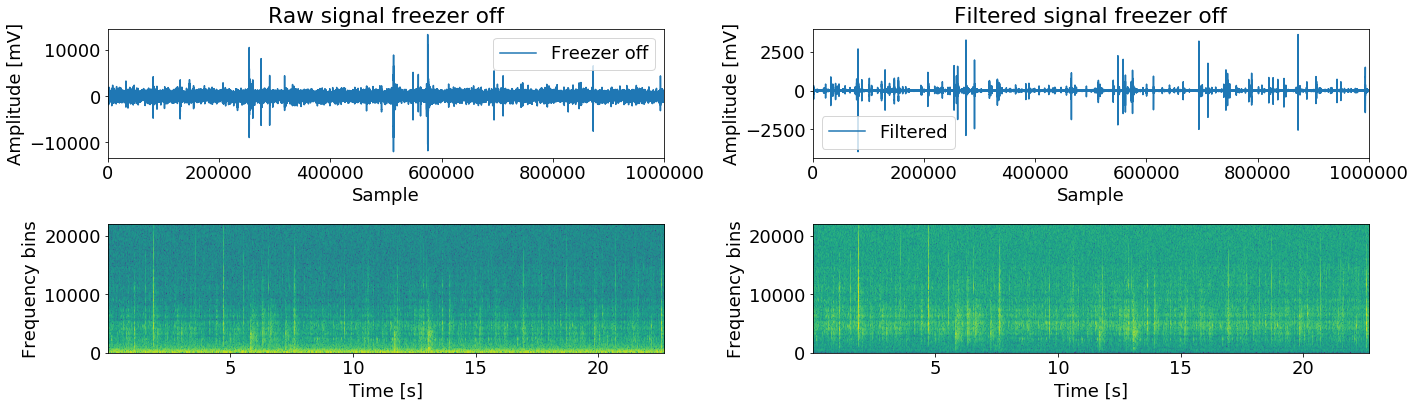

In [82]:
fig, ax = plt.subplots(2,2,figsize=(20,6))
#ax.title('Spectrogram of a wav file with piano music')
ax[0,0].plot(sample, label='Freezer off')
ax[0,0].set_xlabel('Sample')
ax[0,0].set_ylabel('Amplitude [mV]')
ax[0,0].set_title('Raw signal freezer off')
ax[0,0].set_xlim(0,len(sample))
ax[0,0].legend()

ax[0,1].plot(new_signal, label='Filtered')
#ax[0,1].plot(peaks, new_signal[peaks], ".", linewidth='0.1')
ax[0,1].set_xlabel('Sample')
ax[0,1].set_ylabel('Amplitude [mV]')
ax[0,1].set_title('Filtered signal freezer off')
ax[0,1].set_xlim(0,len(sample))
ax[0,1].legend()

Pxx, freqs, bins, im = ax[1,0].specgram(sample,Fs=samplingFrequency, NFFT=256, noverlap=128)
ax[1,0].set_xlabel('Time [s]')
ax[1,0].set_ylabel('Frequency bins')

Pxx, freqs, bins, im = ax[1,1].specgram(new_signal,Fs=samplingFrequency, NFFT=256, noverlap=128)
ax[1,1].set_xlabel('Time [s]')
ax[1,1].set_ylabel('Frequency bins')


fig.tight_layout()
fig.savefig('Spectrogram')
fig.show()

In [29]:
wien = wiener(Pxx)

In [30]:
fig, ax = plt.subplots(figsize=(18,5))
plt.pcolormesh(bins,freqs,Pxx, norm=mpl.colors.LogNorm())
plt.colorbar()

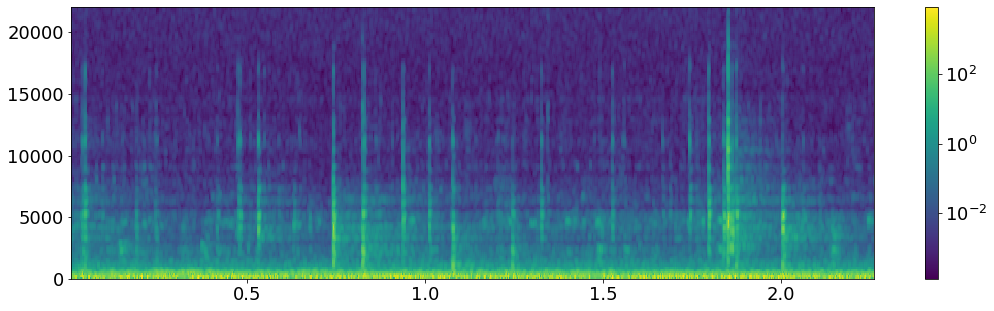

In [31]:
fig, ax = plt.subplots(figsize=(18,5))
plt.pcolormesh(bins,freqs,wien, norm=mpl.colors.LogNorm())
plt.colorbar()

array([ 2.62146541e-19,  2.06119377e-05,  1.10581771e-03,  4.61792738e-03,
        9.07954814e-03,  6.75299581e-03, -1.50774838e-02, -6.46944811e-02,
       -1.34041405e-01, -1.96706065e-01,  7.77885067e-01, -1.96706065e-01,
       -1.34041405e-01, -6.46944811e-02, -1.50774838e-02,  6.75299581e-03,
        9.07954814e-03,  4.61792738e-03,  1.10581771e-03,  2.06119377e-05,
        2.62146541e-19])

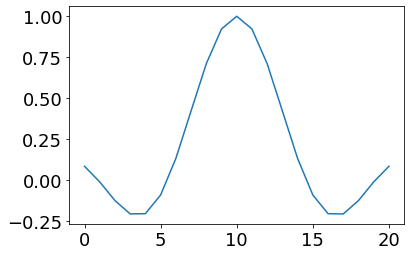

In [65]:
fc = 0.11
b = 0.2
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)

sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
plt.plot(n,sinc_func)
window = np.blackman(N)
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

# reverse function
sinc_func = -sinc_func
#plt.plot(n,sinc_func)
sinc_func[int((N - 1) / 2)] += 1

s = sample
new_signal = np.convolve(s, sinc_func)
sinc_func

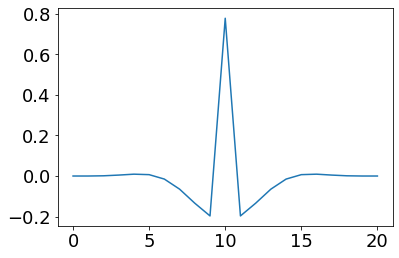

In [66]:
plt.plot(sinc_func,'-')

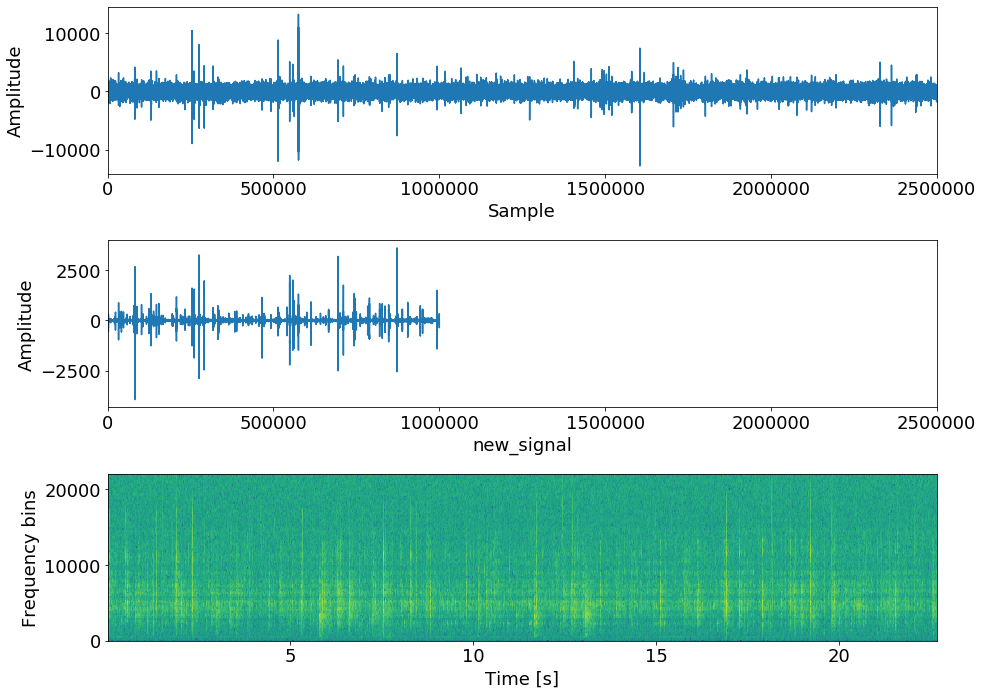

In [67]:
fig, ax = plt.subplots(3, 1,figsize=(14,10))
#ax.title('Spectrogram of a wav file with piano music')
ax[0].plot(sample_off)
ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Amplitude')
ax[0].set_xlim(0,len(sample_off))


ax[1].plot(new_signal)
ax[1].set_xlabel('new_signal')
ax[1].set_ylabel('Amplitude')
ax[1].set_xlim(0,len(sample_off))


Pxx, freqs, bins, im = ax[2].specgram(new_signal,Fs=samplingFrequency, NFFT=256, noverlap=128)
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Frequency bins')

fig.tight_layout()
fig.savefig('Filtered spectrogram')
fig.show()

In [69]:
peaks, properties = signal.find_peaks(new_signal, height=70, distance=500)
peaks.shape

(362,)

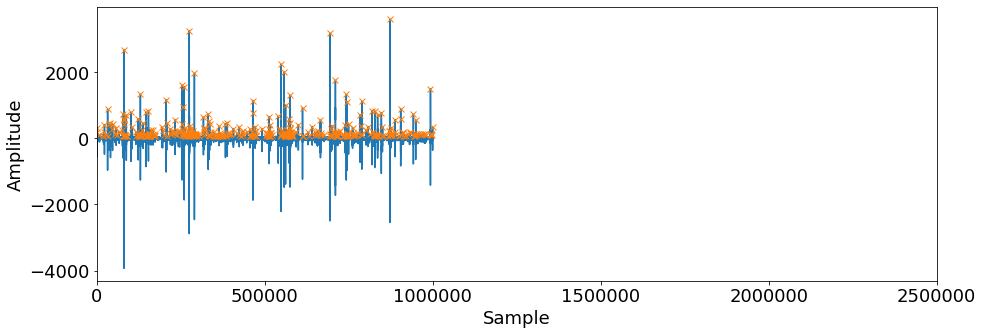

In [70]:
fig, ax = plt.subplots(figsize=(14,5))
#ax.title('Spectrogram of a wav file with piano music')
ax.plot(new_signal)
ax.plot(peaks, new_signal[peaks], "x")
ax.set_xlabel('Sample')
ax.set_ylabel('Amplitude')
ax.set_xlim(0,len(sample_off))
fig.tight_layout()
fig.savefig('peaks')



In [37]:
len(new_signal)

100020

/opt/conda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


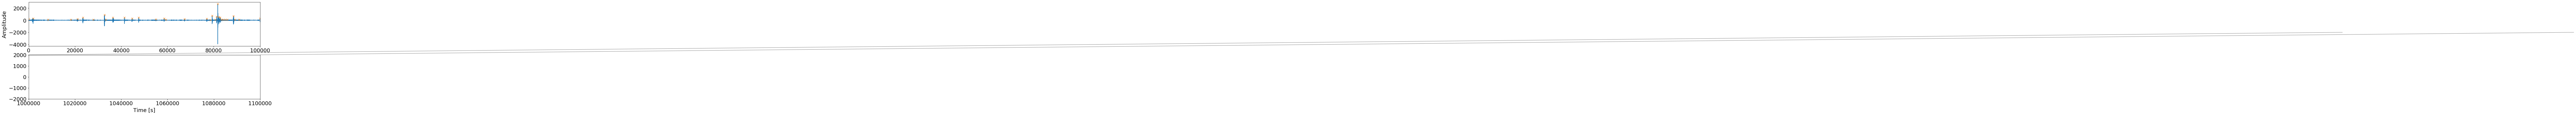

In [38]:
fig, (ax, axins) = plt.subplots(2,1,figsize=(14,6))
ax.plot(new_signal)
ax.plot(peaks, new_signal[peaks], "x")
ax.set_ylabel('Amplitude')
ax.set_xlim(0,len(new_signal))


#axins = zoomed_inset_axes(ax, 3, loc=5) # zoom = 6
axins.plot(new_signal)
axins.plot(peaks, new_signal[peaks], "x")
x1, x2, y1, y2 = 1000000, 1100000, -2000, 2000
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('Time [s]')

mark_inset(ax, axins,loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="0.5")
fig.tight_layout()
fig.savefig('Soundwave peaks')

In [39]:
yf_new = fft(new_signal)
xf_new = fftfreq(len(yf_new), 1 / samplingFrequency)

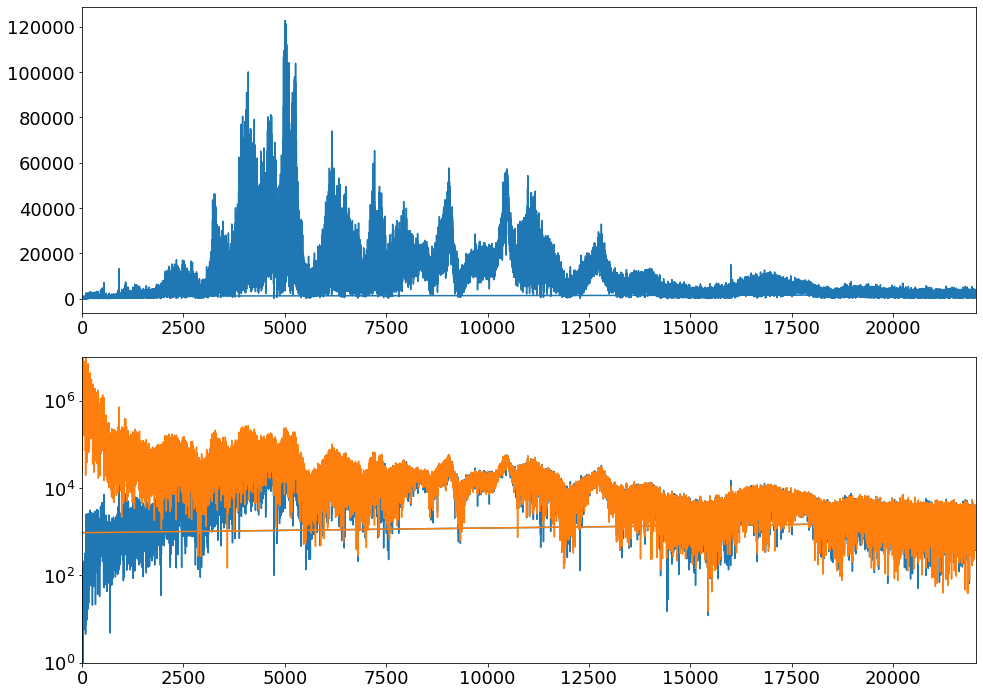

In [40]:
fig, ax = plt.subplots(2,1, figsize=(14,10))
ax[0].plot(xf_new, np.abs(yf_new))
ax[0].set_xlim(0,samplingFrequency/2)

ax[1].semilogy(xf_new, np.abs(yf_new))
ax[1].set_xlim(0, samplingFrequency/2)
#ax[1].set_ylim(1,10**6)
ax[1].semilogy(xf, np.abs(yf))
ax[1].set_xlim(0, samplingFrequency/2)
ax[1].set_ylim(1,10**7)
fig.tight_layout()
fig.savefig('filtered frequency')
plt.show()

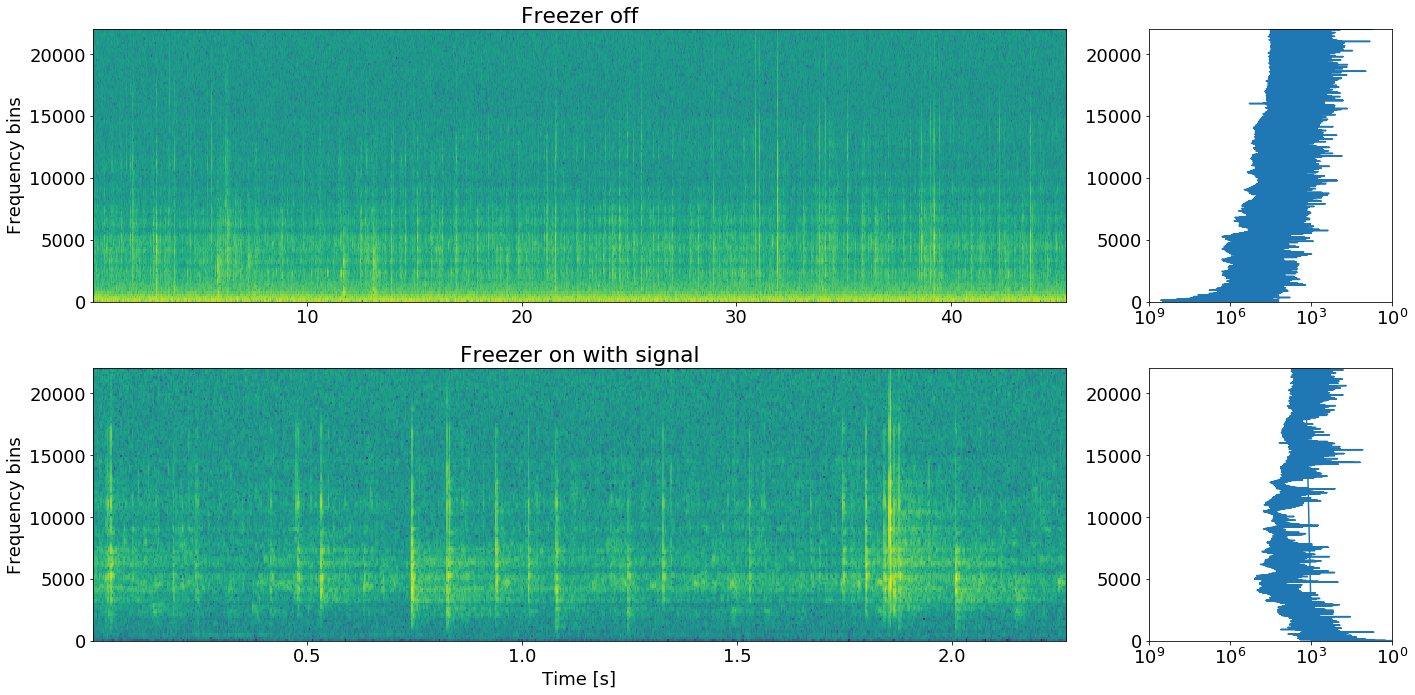

In [41]:
fig, ax = plt.subplots(2,2,gridspec_kw={
                           'width_ratios': [4, 1]}, figsize=(20,10))

ax[0,0].specgram(sample_off[0:2000000],Fs=samplingFrequency, NFFT=256, noverlap=128, label='Freezer off')
ax[0,0].set_title('Freezer off')
ax[0,0].set_ylabel('Frequency bins')

ax[1,0].specgram(new_signal[0:2000000],Fs=samplingFrequency, NFFT=256, noverlap=128)
ax[1,0].set_title('Freezer on with signal')
ax[1,0].set_ylabel('Frequency bins')
ax[1,0].set_xlabel('Time [s]')

ax[0,1].semilogx(np.abs(yf_off), xf_off)
ax[0,1].set_ylim(0, samplingFrequency/2)
ax[0,1].set_xlim(1,10**9)
ax[0,1].invert_xaxis()

ax[1,1].semilogx(np.abs(yf_new), xf_new)
ax[1,1].set_ylim(0, samplingFrequency/2)
ax[1,1].set_xlim(1,10**9)
ax[1,1].invert_xaxis()

fig.tight_layout()
fig.savefig('Spectrogram filtered')
fig.show()

In [42]:
pip install wavio

Note: you may need to restart the kernel to use updated packages.


In [43]:
import wavio

In [107]:
new = new_signal.astype(np.int32)

In [108]:
new.dtype

dtype('int32')

In [110]:
wavio.write("wavio sound_new.wav", new, samplingFrequency)

In [45]:
Fs = samplingFrequency/1
Fs = int(Fs)
write('sound orig.mp3', Fs, sample_orig)

In [88]:
Fs = samplingFrequency/1
Fs = int(Fs)
write('sound_new.wav', Fs, new_signal)

In [47]:
ipd.Audio('sound.mp3')

In [48]:
Fs = samplingFrequency/1
Fs = int(Fs)
write('sound filtered.mp3', Fs, new_signal)

In [49]:
ipd.Audio('sound filtered.mp3')

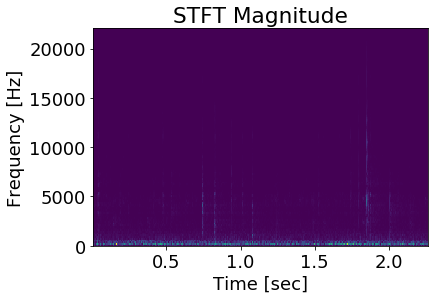

In [50]:
f, t, Zxx = signal.spectrogram(sample, samplingFrequency, mode='magnitude')
plt.pcolormesh(t, f, np.abs(Zxx))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [32]:
Zxx.shape

(129, 446)

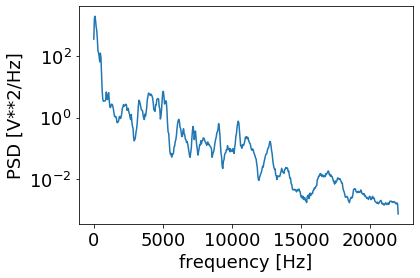

In [33]:
f, Pxx = signal.welch(sample, Fs, nperseg=1024)

plt.semilogy(f, Pxx)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [84]:
pip install soundfile

     |████████████████████████████████| 409kB 4.7MB/s eta 0:00:01
     |████████████████████████████████| 112kB 5.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [85]:
import soundfile as sf

OSError: sndfile library not found